In [28]:
from pathlib import Path

import pandas as pd

import src

df1 = pd.read_csv(Path.joinpath(src.PATH, "important_outputs", "params", "LHS_BW_2021_01_20.csv"))
df1["state"] = "Baden-Wuerttemberg"


df2 = pd.read_csv(Path.joinpath(src.PATH, "important_outputs", "params", "LHS_HH_2021_01_22.csv"))
df2["state"] = "Hamburg"


df3 = pd.read_csv(Path.joinpath(src.PATH, "important_outputs", "params", "LHS_SL_2021_01_20.csv"))
df3["state"] = "Saarland"


df4 = pd.read_csv(Path.joinpath(src.PATH, "important_outputs", "params", "LHS_BY_2021_01_14.csv"))
df4["state"] = "Bavaria"


df = pd.concat([df1, df2, df3, df4])


df = df.sort_values(by="like1", ascending=False)

df["Negative RMSE"] = df["like1"]

df.head(5)

,like1,parinfection_prob,parn_ticks_to_quarantine,simulation_0,simulation_1,simulation_2,simulation_3,simulation_4,simulation_5,simulation_6,...,simulation_93,simulation_94,simulation_95,simulation_96,simulation_97,simulation_98,simulation_99,chain,state,Negative RMSE
79,-8.414,0.06450,23.73,52.1,82.06,95.50,100.80,107.70,118.06,131.90,...,369.5,369.8,370.0,370.2,370.8,371.0,371.2,1.0,Bavaria,-8.414
61,-8.590,0.06360,26.44,52.1,83.06,96.56,101.40,108.44,119.10,132.60,...,367.8,368.0,368.5,368.8,369.2,369.5,369.8,1.0,Bavaria,-8.590
42,-8.620,0.04727,23.36,48.1,78.30,91.90,96.75,101.40,109.60,120.20,...,275.5,275.5,275.5,275.5,275.5,275.5,275.5,1.0,Saarland,-8.620
35,-8.640,0.04670,20.66,48.1,78.06,92.00,96.75,101.94,109.56,120.94,...,278.0,278.2,278.2,278.2,278.2,278.5,278.5,1.0,Saarland,-8.640
140,-8.690,0.04740,18.36,48.1,78.94,92.25,96.75,101.94,110.25,120.25,...,276.0,276.0,276.0,276.0,276.2,276.2,276.2,1.0,Saarland,-8.690


In [29]:
df1_best = df1[df1["like1"] == df1["like1"].max()]
df2_best = df2[df2["like1"] == df2["like1"].max()]
df3_best = df3[df3["like1"] == df3["like1"].max()]
df4_best = df4[df4["like1"] == df4["like1"].max()]
df_best = pd.concat([df1_best, df2_best, df3_best, df4_best])
df_best["Negative RMSE"] = -df_best["like1"]
df_best.head()

,like1,parinfection_prob,parn_ticks_to_quarantine,simulation_0,simulation_1,simulation_2,simulation_3,simulation_4,simulation_5,simulation_6,...,simulation_93,simulation_94,simulation_95,simulation_96,simulation_97,simulation_98,simulation_99,chain,state,Negative RMSE
152,-12.586,0.06213,21.78,49.20,79.30,93.06,97.80,104.00,114.00,126.56,...,322.5,322.8,323.0,323.5,323.8,324.0,324.2,1.0,Baden-Wuerttemberg,12.586
33,-16.560,0.05020,26.92,47.28,77.40,91.20,95.94,101.94,110.60,121.70,...,279.8,279.8,280.0,280.0,280.2,280.2,280.2,1.0,Hamburg,16.560
42,-8.620,0.04727,23.36,48.10,78.30,91.90,96.75,101.40,109.60,120.20,...,275.5,275.5,275.5,275.5,275.5,275.5,275.5,1.0,Saarland,8.620
79,-8.414,0.06450,23.73,52.10,82.06,95.50,100.80,107.70,118.06,131.90,...,369.5,369.8,370.0,370.2,370.8,371.0,371.2,1.0,Bavaria,8.414


In [30]:
df.groupby("state")["Negative RMSE"].max()

state
Baden-Wuerttemberg   -12.586
Bavaria               -8.414
Hamburg              -16.560
Saarland              -8.620
Name: Negative RMSE, dtype: float64

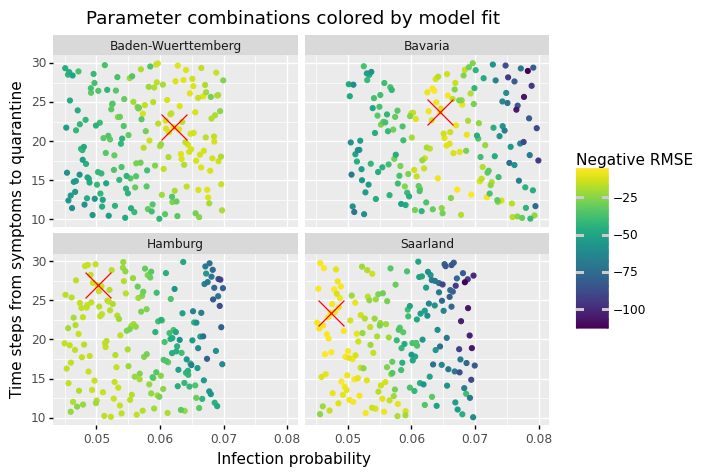

<ggplot: (142797044562)>

In [31]:
from plotnine import ggplot, xlab, ylab, ggtitle, geom_point, aes, facet_wrap
#theme_set(theme_void())
g = (
    ggplot()
    + facet_wrap("state")
    + geom_point(data=df, mapping=aes(x="parinfection_prob", y="parn_ticks_to_quarantine", color="Negative RMSE"))
    + geom_point(data=df_best, mapping=aes(x="parinfection_prob", y="parn_ticks_to_quarantine"), shape="x", size=10, color="red")
    + ggtitle("Parameter combinations colored by model fit")
    + xlab("Infection probability")
    + ylab("Time steps from symptoms to quarantine")
    )

g

In [32]:
g.save(filename="param_plot.pdf")

C:\Users\ac135963\Anaconda3\envs\covid19_sim\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\ac135963\Anaconda3\envs\covid19_sim\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: param_plot.pdf


PermissionError: [Errno 13] Permission denied: 'param_plot.pdf'